In [ ]:
!pip install geopandas
!pip install contextily
import contextily as ctx
import geopandas
import pandas as pd

     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.3 MB/s 
     |████████████████████████████████| 15.4 MB 35.0 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia


In [ ]:
italia = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(facecolor = "none", edgecolor = "b", figsize = (20,10))
ctx.add_basemap(italia)

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

In [ ]:
import xyzservices.providers as xyz
italia = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(facecolor = "none", edgecolor = "b", figsize = (12,6))
ctx.add_basemap(italia, source=ctx.providers.Stamen.TonerLite)

ValueError: ignored

3. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf")

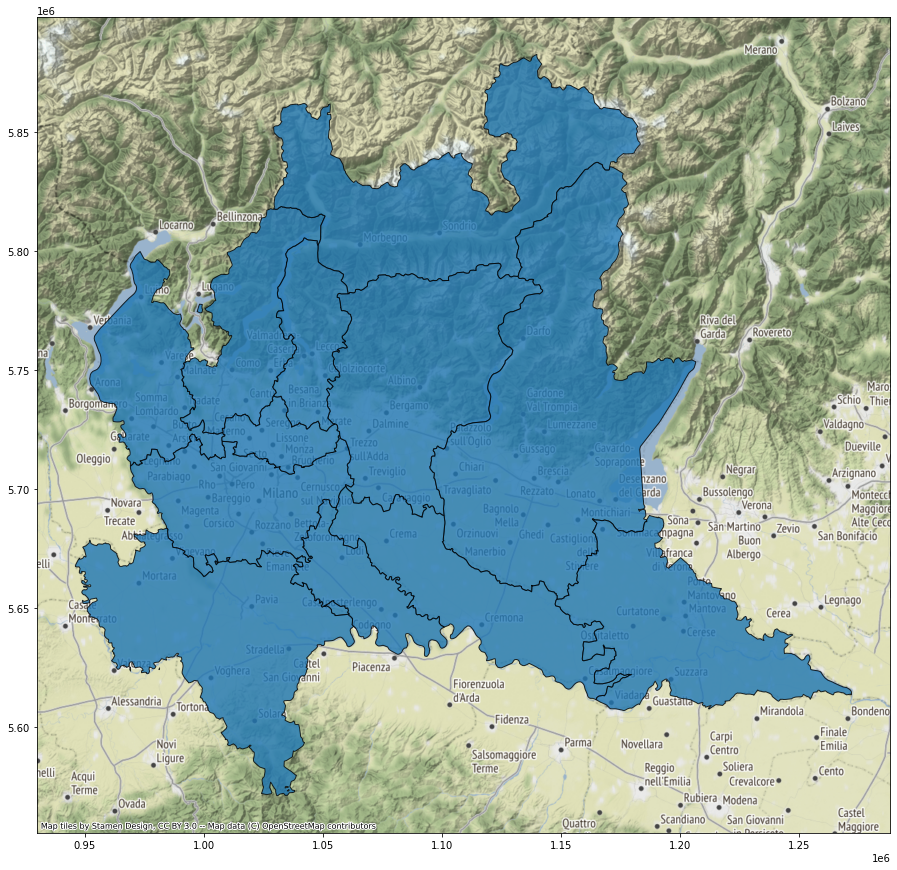

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf")
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"]
ax = province[province.within(lombardia.geometry.squeeze())].to_crs(epsg=3857).plot(alpha = 0.8, figsize=(30,15), edgecolor = "k")
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf")

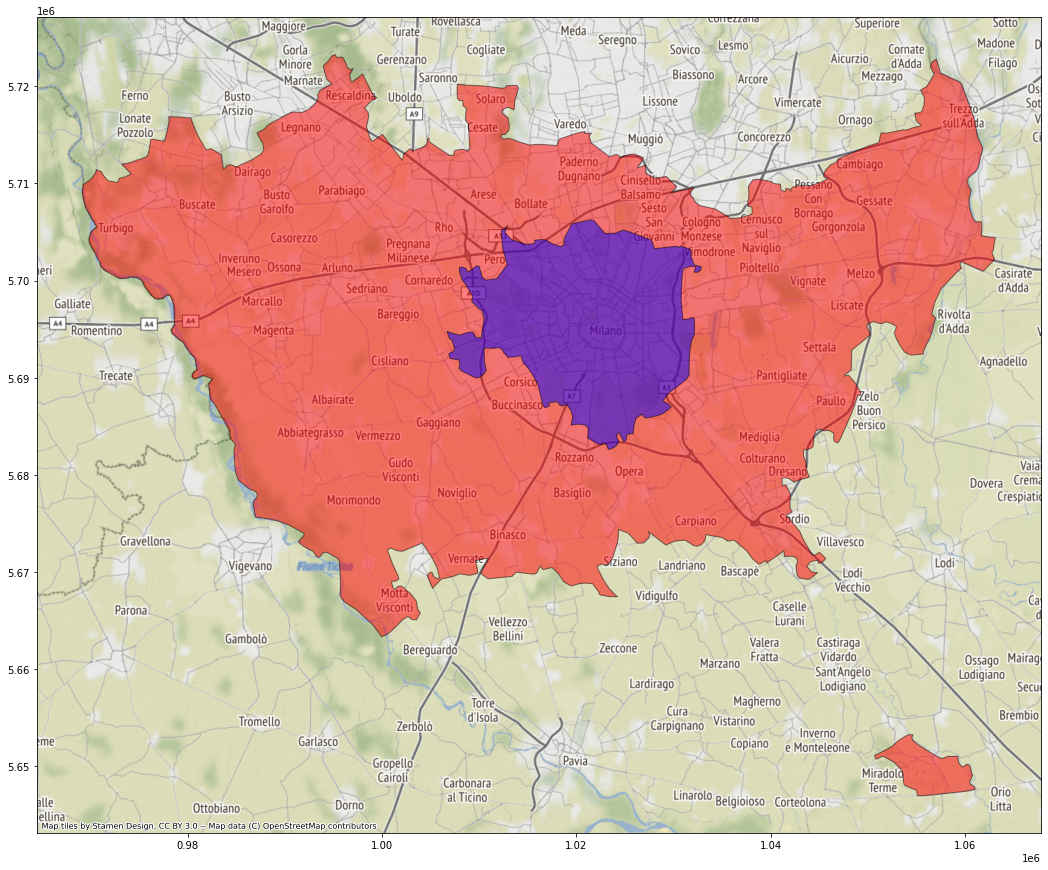

In [ ]:
milano = comuni[comuni["COMUNE"] == "Milano"]
ax = province[province["DEN_UTS"] == "Milano"].to_crs(epsg=3857).plot(alpha = 0.5, figsize=(30,15), edgecolor = "k", facecolor = "r")
milano.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k", facecolor = "b", alpha = 0.5)
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

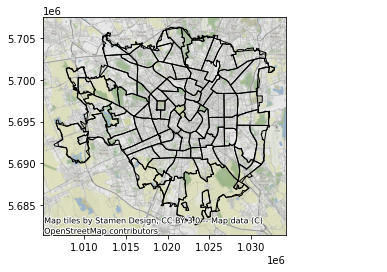

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf")
ax = quartieri.to_crs(epsg=3857).plot(edgecolor = "k", facecolor = "none")
milano.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.